In [1]:
import os
print(os.getcwd())

C:\Users\Skigdot


In [37]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Cargar el conjunto de datos
data = pd.read_csv('C:/Users/Skigdot/Documents/UNAD/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 5/Titanic-Dataset.csv')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

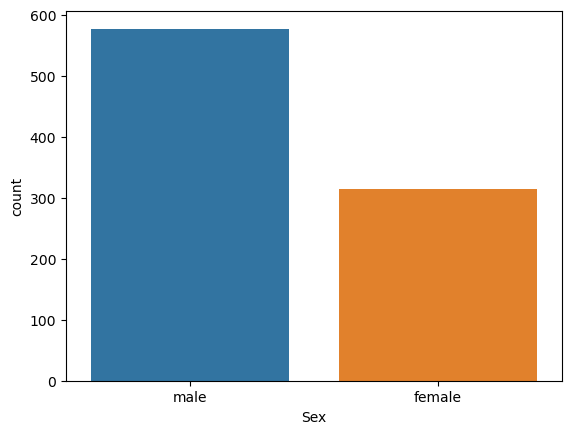

In [58]:
# Paso 1: Análisis Exploratorio de Datos

# Importar bibliotecas necesarias
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('C:/Users/Skigdot/Documents/UNAD/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 5/Titanic-Dataset.csv')

# Visualizar las primeras filas del conjunto de datos
print(data.head())

# Resumen estadístico del conjunto de datos
print(data.describe())

# Conteo de valores únicos en variables categóricas
# Por ejemplo, para las columnas 'Sex' y 'Embarked'
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

# Visualización de relaciones entre variables
# Por ejemplo, aquí hay un ejemplo de un gráfico de barras para la columna 'Sex'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=data)
plt.show()

In [68]:
# PASO 2

# Codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder

# Codificación one-hot para las columnas categóricas 'Sex' y 'Embarked'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(data[['Sex', 'Embarked']])

# Obtener los nombres de las nuevas columnas codificadas
encoded_cols = encoder.get_feature_names_out(['Sex', 'Embarked'])

# Crear un DataFrame con los datos codificados y los nuevos nombres de columnas
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

# Concatenar el DataFrame codificado con el conjunto de datos original
data = pd.concat([data, encoded_df], axis=1)

# Eliminar las columnas originales 'Sex' y 'Embarked'
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Mostrar las primeras filas del conjunto de datos después del preprocesamiento
print(data.head())

    PassengerId  Survived  Pclass  \
1           2.0       1.0     1.0   
3           4.0       1.0     1.0   
6           7.0       0.0     1.0   
10         11.0       1.0     3.0   
11         12.0       1.0     1.0   

                                                 Name   Age  SibSp  Parch  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0    1.0    0.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0    1.0    0.0   
6                             McCarthy, Mr. Timothy J  54.0    0.0    0.0   
10                    Sandstrom, Miss. Marguerite Rut   4.0    1.0    1.0   
11                           Bonnell, Miss. Elizabeth  58.0    0.0    0.0   

      Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
1   PC 17599  71.2833   C85       0.0         0.0         1.0  
3     113803  53.1000  C123       0.0         0.0         1.0  
6      17463  51.8625   E46       1.0         0.0         1.0  
10   PP 9549  16.7000    G6       1.0         0.0         

C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Cargar el dataset del Titanic
data = pd.read_csv('C:/Users/Skigdot/Documents/UNAD/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 5/Titanic-Dataset.csv')

# Eliminar columnas irrelevantes o que contienen datos no numéricos
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Convertir la columna 'Sex' en una variable binaria (0 o 1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Tratar los valores faltantes (por ejemplo, imputando la mediana)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Dividir el dataset en características (X) y variable objetivo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Seleccionar las mejores características utilizando la prueba chi-cuadrado
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Obtener las puntuaciones y características seleccionadas
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

# Concatenar puntuaciones y características seleccionadas
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Mostrar las características seleccionadas
print(feature_scores)

  Feature        Score
5    Fare  4518.319091
1     Sex   170.348127
0  Pclass    30.873699
2     Age    21.649163
4   Parch    10.097499
3   SibSp     2.581865


In [74]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjunto de entrenamiento y prueba (por ejemplo, 70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma del conjunto de entrenamiento (X):", X_train.shape)
print("Forma del conjunto de prueba (X):", X_test.shape)
print("Forma del conjunto de entrenamiento (y):", y_train.shape)
print("Forma del conjunto de prueba (y):", y_test.shape)

Forma del conjunto de entrenamiento (X): (623, 6)
Forma del conjunto de prueba (X): (268, 6)
Forma del conjunto de entrenamiento (y): (623,)
Forma del conjunto de prueba (y): (268,)


In [75]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)

# Imprimir los coeficientes de las características del modelo
print("Coeficientes del modelo:", model.coef_)

# Imprimir la intersección del modelo
print("Intersección del modelo:", model.intercept_)

Coeficientes del modelo: [[-0.89796723  2.50511225 -0.03408397 -0.28960296 -0.11128099  0.00374911]]
Intersección del modelo: [1.63116417]


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8134328358208955
Precision: 0.8144329896907216
Recall: 0.7117117117117117
F1 Score: 0.7596153846153846


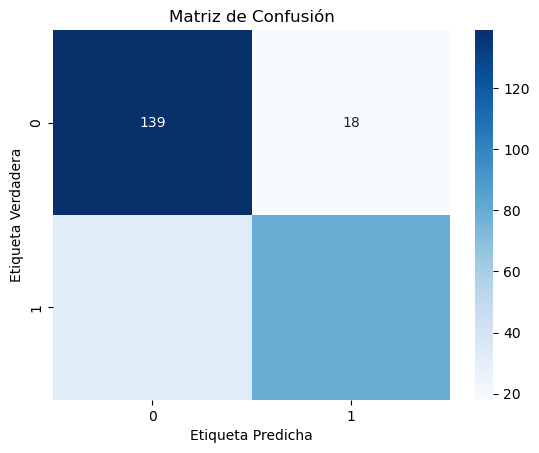

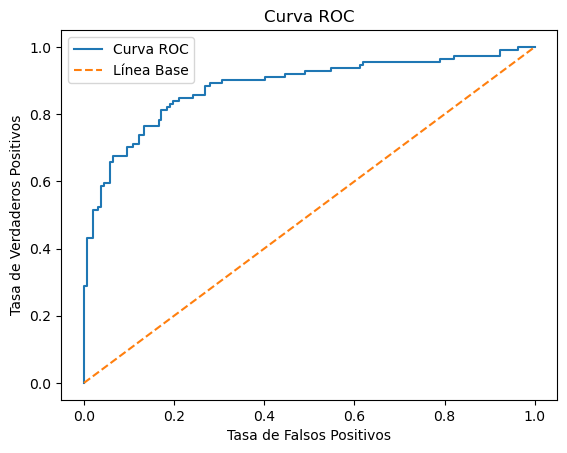

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# Curva ROC
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0, 1], [0, 1], linestyle='--', label="Línea Base")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [78]:
# Interpretación y Análisis de Resultados
# Puedes agregar aquí tus observaciones sobre las métricas y gráficos generados
print("Interpretación y Análisis de Resultados:")
print("El modelo de regresión logística ha alcanzado un accuracy de {:.2f}.".format(accuracy))
print("La precisión del modelo es de {:.2f}.".format(precision))
print("El recall del modelo es de {:.2f}.".format(recall))
print("El F1-score del modelo es de {:.2f}.".format(f1))

# Documentación de Resultados
# Puedes agregar aquí un resumen de las observaciones y conclusiones alcanzadas
print("\nDocumentación de Resultados:")
print("El modelo de regresión logística entrenado en el dataset del Titanic muestra un desempeño razonable en la predicción de la supervivencia de los pasajeros.")
print("El accuracy del modelo indica que el {:.2f}% de las predicciones son correctas.".format(accuracy * 100))
print("La precisión del modelo indica que el {:.2f}% de las personas clasificadas como sobrevivientes realmente sobrevivieron.".format(precision * 100))
print("El recall del modelo indica que el {:.2f}% de las personas que realmente sobrevivieron fueron identificadas correctamente por el modelo.".format(recall * 100))
print("El F1-score del modelo es una medida combinada de precisión y recall, y su valor indica el equilibrio entre ambas métricas.")


Interpretación y Análisis de Resultados:
El modelo de regresión logística ha alcanzado un accuracy de 0.81.
La precisión del modelo es de 0.81.
El recall del modelo es de 0.71.
El F1-score del modelo es de 0.76.

Documentación de Resultados:
El modelo de regresión logística entrenado en el dataset del Titanic muestra un desempeño razonable en la predicción de la supervivencia de los pasajeros.
El accuracy del modelo indica que el 81.34% de las predicciones son correctas.
La precisión del modelo indica que el 81.44% de las personas clasificadas como sobrevivientes realmente sobrevivieron.
El recall del modelo indica que el 71.17% de las personas que realmente sobrevivieron fueron identificadas correctamente por el modelo.
El F1-score del modelo es una medida combinada de precisión y recall, y su valor indica el equilibrio entre ambas métricas.
